In [1]:
#Importing the packags
# pip install --user -U nltk
# pip install -U scikit-learn

import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14696\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv('movie.csv').astype(str)
df = df.sample(frac = 1)
df

,Unnamed: 0,text,label
26981,30175,family guy hilarious long feel like lost sharp...,1
17357,18958,old high school teacher mine used brag seen ev...,0
30451,16369,"must say, thought seen all. extremely jaded mo...",1
14959,38784,"absolutely love show, saw second episode first...",1
24427,24545,watched film really enjoyed gregory's girl man...,0
...,...,...,...
33673,9519,miserable people done everything complain dial...,1
31724,12809,movie all. classic depiction events surrounded...,1
10033,22157,going say first given film 3 10 thought. going...,0
29441,38990,"like arnold, love subject matter, disappointin...",0


In [3]:
#No of a categories
df['label'].value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

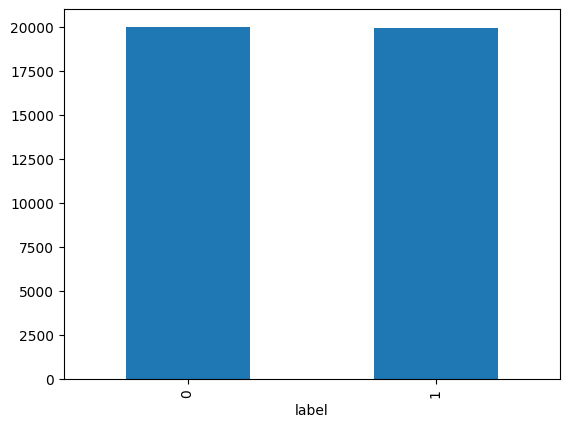

In [4]:
#Analyzing data
df['label'].value_counts().plot.bar()
plt.show()

In [5]:
#Data Preprocessing

In [6]:
df['text'][0]

"fan original book expecting see better adaptation natalie portman movie, found awful. version even worse.<br /><br />first, little ms. gregory's book script. whole subplot george boleyn's sexuality completely eliminated version george merely flunky shuttling duty boleyn family duty king. thought title book referred mary lesser-known boleyn sisters, used refer anne.<br /><br />second, script characters periodically address audience confession. apparently intended give bit back story explain motives, amateurish execution.<br /><br />on top bad script, direction stunningly bad. many shots done circling camera none-too-steady best downright shaky worst. several speeches delivered tentatively, first rehearsal. production values henry's flamboyant court minimal. costumes vary: copies historical portraits others costume designer's fevered imagination. king, source power favors, often shown alone. fawning courtiers, servants background - people?? accustomed hollywood turning history fantasy, 

In [7]:
re.sub("[^a-zA-Z]", " ", df['text'][0].lower())

'fan original book expecting see better adaptation natalie portman movie  found awful  version even worse  br    br   first  little ms  gregory s book script  whole subplot george boleyn s sexuality completely eliminated version george merely flunky shuttling duty boleyn family duty king  thought title book referred mary lesser known boleyn sisters  used refer anne  br    br   second  script characters periodically address audience confession  apparently intended give bit back story explain motives  amateurish execution  br    br   on top bad script  direction stunningly bad  many shots done circling camera none too steady best downright shaky worst  several speeches delivered tentatively  first rehearsal  production values henry s flamboyant court minimal  costumes vary  copies historical portraits others costume designer s fevered imagination  king  source power favors  often shown alone  fawning courtiers  servants background   people   accustomed hollywood turning history fantasy  

In [8]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14696\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Data Cleaning using stemmer (only to understand)

stemmer = PorterStemmer()
data = "I am loving computing I love computers".split()
data = " ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")
data

'i am love comput i love comput'

In [10]:
# Data Cleaning removing stopwords

In [11]:
" ".join([stemmer.stem(i) for i in df['text'][0].split()])


"fan origin book expect see better adapt natali portman movie, found awful. version even worse.<br /><br />first, littl ms. gregory' book script. whole subplot georg boleyn' sexual complet elimin version georg mere flunki shuttl duti boleyn famili duti king. thought titl book refer mari lesser-known boleyn sisters, use refer anne.<br /><br />second, script charact period address audienc confession. appar intend give bit back stori explain motives, amateurish execution.<br /><br />on top bad script, direct stunningli bad. mani shot done circl camera none-too-steadi best downright shaki worst. sever speech deliv tentatively, first rehearsal. product valu henry' flamboy court minimal. costum vary: copi histor portrait other costum designer' fever imagination. king, sourc power favors, often shown alone. fawn courtiers, servant background - people?? accustom hollywood turn histori fantasy, expect better bbc production. even base flaw book product bad."

In [12]:
" ".join([i for i in df['text'][0].split() if i not in words])

"fan original book expecting see better adaptation natalie portman movie, found awful. version even worse.<br /><br />first, little ms. gregory's book script. whole subplot george boleyn's sexuality completely eliminated version george merely flunky shuttling duty boleyn family duty king. thought title book referred mary lesser-known boleyn sisters, used refer anne.<br /><br />second, script characters periodically address audience confession. apparently intended give bit back story explain motives, amateurish execution.<br /><br />on top bad script, direction stunningly bad. many shots done circling camera none-too-steady best downright shaky worst. several speeches delivered tentatively, first rehearsal. production values henry's flamboyant court minimal. costumes vary: copies historical portraits others costume designer's fevered imagination. king, source power favors, often shown alone. fawning courtiers, servants background - people?? accustomed hollywood turning history fantasy, 

In [13]:
# list(map(lambda <argument>:<operations>, l))

In [14]:
# Doing all cleaning process using regex, stemmer, stopwords for all data


df['text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['text']))

df['text'][1250]

'one best films seen last years.belmonndo deneuve shine respective roles, naive plantation owner enigmatic trickster.words masterpiece justice,suffice say movie explores darker side love pain,humiliation capacity self-delusion go it, although dressed film noir. forget feeble remake jolie banderas, see genuine artticle instead treat moments great cinematic beauty.'

In [18]:
df.to_csv('cleaned_movie.csv')

In [19]:
stemmer = PorterStemmer()
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
df

,Unnamed: 0,text,label,cleaned
26981,30175,family guy hilarious long feel like lost sharp...,1,famili guy hilari long feel like lost sharp ra...
17357,18958,old high school teacher mine used brag seen ev...,0,old high school teacher mine use brag seen eve...
30451,16369,"must say, thought seen all. extremely jaded mo...",1,must say thought seen all extrem jade movi buf...
14959,38784,"absolutely love show, saw second episode first...",1,absolut love show saw second episod first watc...
24427,24545,watched film really enjoyed gregory's girl man...,0,watch film realli enjoy gregori s girl mani ye...
...,...,...,...,...
33673,9519,miserable people done everything complain dial...,1,miser peopl done everyth complain dialogu budg...
31724,12809,movie all. classic depiction events surrounded...,1,movi all classic depict event surround migrat ...
10033,22157,going say first given film 3 10 thought. going...,0,go say first given film thought go give straig...
29441,38990,"like arnold, love subject matter, disappointin...",0,like arnold love subject matter disappoint mov...


In [ ]:
# print(words)

In [ ]:
# words = stopwords.words("nepali")
# words

In [ ]:
# #for all steaming,stopword,regex
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [20]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()


In [21]:
X = df['cleaned']
Y = df['label'].astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=5000)),
                     ('clf', LogisticRegression())])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [22]:
X_test

38229    shazam okay hero high favorit kid mean sky hig...
11726    would legitim actor read script particip piec ...
13490    difficult compet classic great make choic deci...
11484    look page seem disapprov listen someon rambl r...
8117     movi humor charm easili becom favorit enjoy li...
                               ...                        
11127    bad entri seri heavili ladl war propaganda rat...
7288     third comment attempt connect two legendari mo...
31633    anim serious rock sock anim first open itself ...
22489    bela lagosi s best movi got good old style app...
3091     desper find happen twitch origin movi here cha...
Name: cleaned, Length: 6000, dtype: object

In [23]:
y_test

38229    1
11726    0
13490    0
11484    1
8117     1
        ..
11127    1
7288     1
31633    1
22489    1
3091     0
Name: label, Length: 6000, dtype: object

In [24]:
#Test Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
# print(predict_news_cat)
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.8853333333333333


In [25]:
#Train Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_train)
# print(predict_news_cat)
print(accuracy_score(y_train,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9036470588235294


In [31]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)
news_data_df['predict_news'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), news_data_df['predict_news']))
news_data_df['predict_news'] = news_data_df['predict_news'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news =  2


Predicted news category =  1


In [28]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      3005
           1       0.87      0.91      0.89      2995

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000

[[2584  421]
 [ 267 2728]]


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (5).

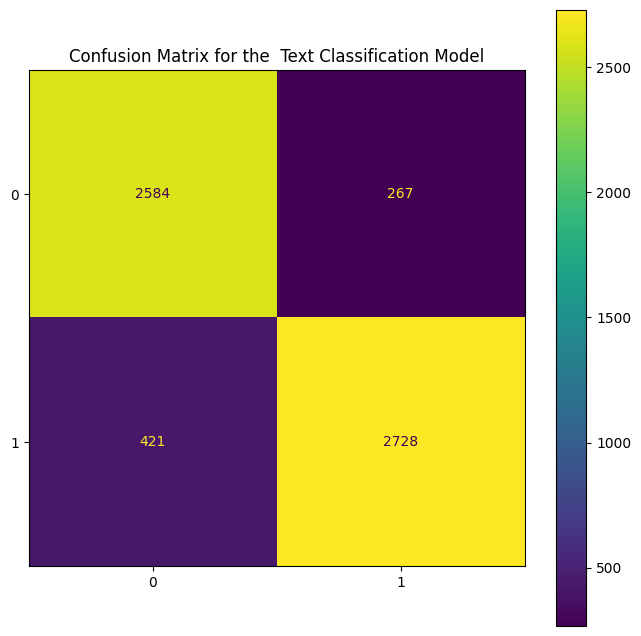

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [ ]:
# vectorizer.vocabulary_